# Imports

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import numpy as np

print(__doc__)

Automatically created module for IPython interactive environment


In [17]:
X = pd.read_csv('../data/processed/processed.csv')
X.describe()

,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,tests_units_people tested,tests_units_people tested (incl. non-PCR),tests_units_samples tested,tests_units_tests performed,tests_units_units unclear
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,0.127975,0.107716,0.098727,0.218013,0.284041,0.332612,0.009456,0.018599,0.476373,0.298155,...,0.355651,0.384759,0.207972,0.605041,0.613393,0.080189,0.009434,0.103774,0.264151,0.009434
std,0.171390,0.158476,0.121717,0.075511,0.124521,0.139015,0.070734,0.078992,0.260075,0.224128,...,0.161260,0.178141,0.164217,0.223197,0.249364,0.272228,0.096898,0.305688,0.441924,0.096898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013483,0.012303,0.020177,0.196558,0.204819,0.252667,0.000143,0.002183,0.252266,0.096468,...,0.267401,0.271406,0.094526,0.486630,0.423205,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.064645,0.043600,0.062515,0.210115,0.263504,0.320844,0.000903,0.005013,0.484667,0.254989,...,0.350624,0.438372,0.182847,0.649686,0.666110,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.173393,0.144090,0.132502,0.218505,0.336651,0.423178,0.003442,0.013215,0.693353,0.465624,...,0.427557,0.506435,0.264599,0.766134,0.798502,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


For n_clusters = 2 The average silhouette_score is : 0.2691417782810676
For n_clusters = 3 The average silhouette_score is : 0.2496328419066602
For n_clusters = 4 The average silhouette_score is : 0.27843872100810035
For n_clusters = 5 The average silhouette_score is : 0.3030708388058621
For n_clusters = 6 The average silhouette_score is : 0.3054220766640497


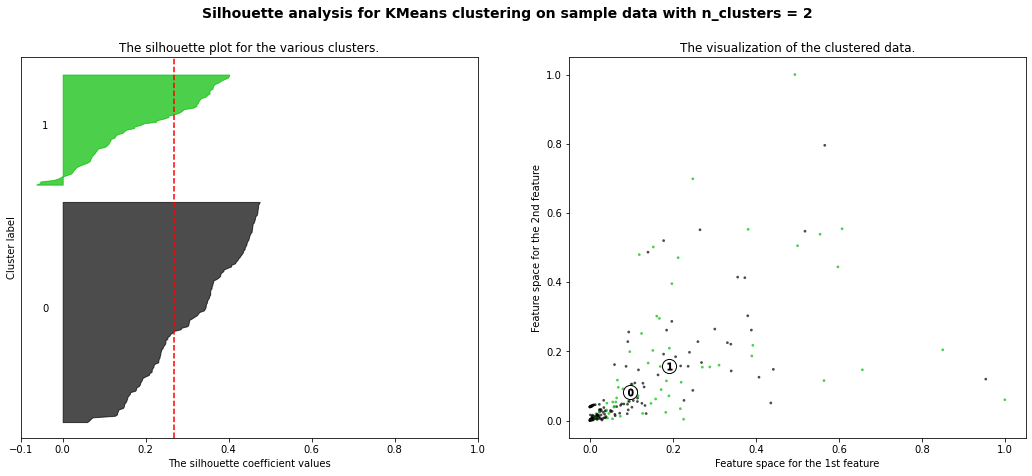

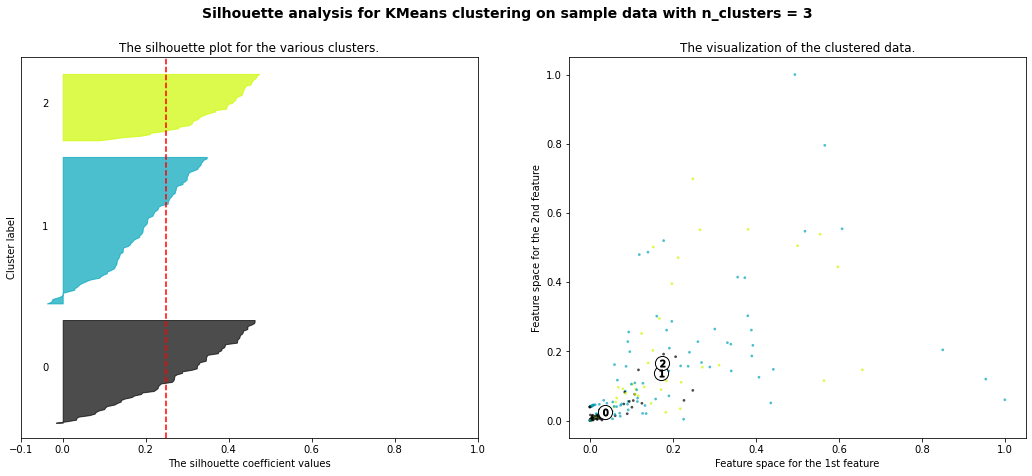

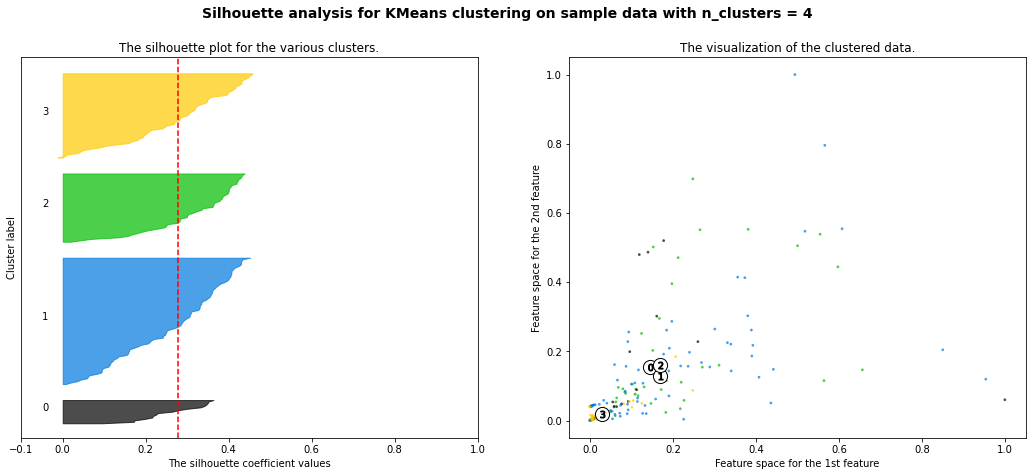

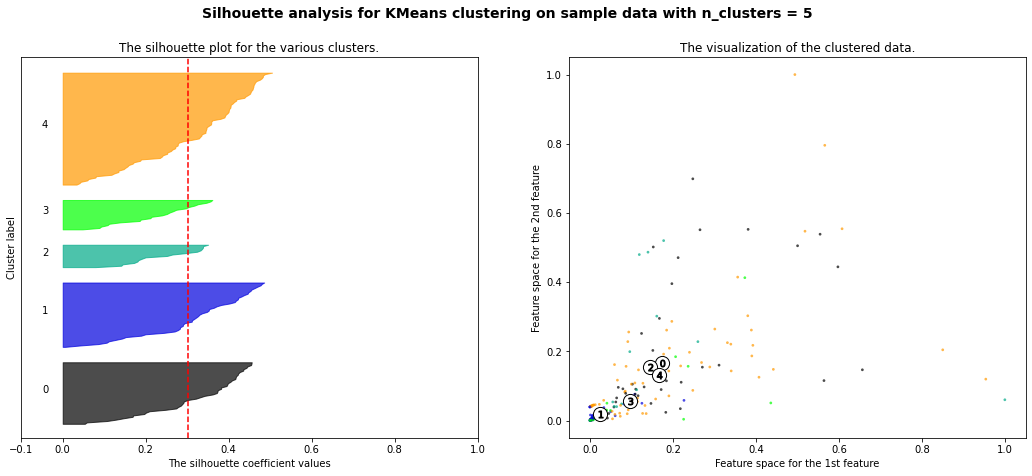

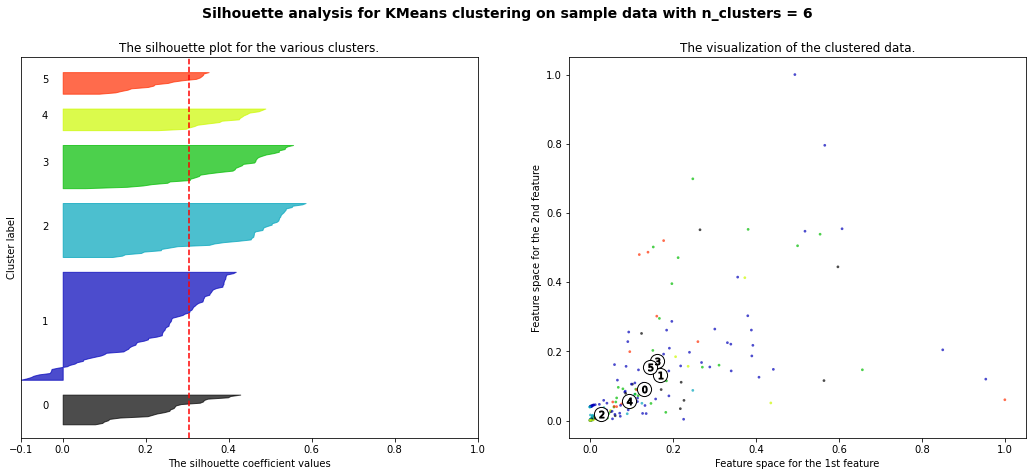

In [18]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['total_cases_per_million'], X['total_deaths_per_million'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
